# Opis ELO ocen v šahu

ELO ocena temelji, na predpostavki, da je šahovska uspešnost pri posamezni igri slučajna spremenljivka, ki je porazdeljena normalno.
Recimo, da imamo igralca A in B z ELO ocenama $R_A$ in $R_B$, potem je pričakovana vrednost za zmago igralca:
\begin{align}
E_A = \frac{1}{1 + 10^{\frac{R_B - R_A}{400}}} \, \quad && \quad \, E_B = \frac{1}{1 + 10^{\frac{R_A - R_B}{400}}}
\end{align}

Igralec, ki zmaga dobi točke igralec, ki pa izgubi igro izgubi točke.
Večja kot je razlika $|R_A - R_B|$, več točk dobi igralec, ki je zmagal in ima manjšo oceno, več jih izgubi igralec, ki je izgubil in ima višjo oceno. To izračunamo po formulah:
\begin{align}
R^{'}_A = R_A + K(S_A - E_A) \, \quad && \quad \, R^{'}_B = R_B + K(S_A - E_B),
\end{align}

kjer je $S_{A/B} \in \{1, \frac{1}{2}, 0\}$ (zmaga, izenači, izgubi) in $K = 16$ (za šibkejše igralce se ponavadi vzame $K = 32$). 

Primer:
- A ima oceno 2600
- B ima oceno 2300 .

Potem sta:
- E_A = $\frac{1}{1 + 10^{\frac{2300 - 2600}{400}}} = 0.849$
- E_B = $\frac{1}{1 + 10^{\frac{2600 - 2300}{400}}} = 0.151$ 

Če zmaga A, sta novi oceni, torej $S_A$ = 1 in $S_B$ = 0:
- $R^{'}_A = 2600 + 16(1 - 0.849) = 2602$
- $R^{'}_B = 2300 + 16(0 - 0.151) = 2298$

Če izenačita, torej S_A = S_B = \frac{1}{2}:
- $R^{'}_A = 2600 + 16(0.5 - 0.849) = 2594$
- $R^{'}_B = 2300 + 16(0.5 - 0.151) = 2306$ 

Če zmaga B, torej $S_B$ = 1 in $S_A$ = 0:
- $R^{'}_A = 2600 + 16(0 - 0.849) = 2586$
- $R^{'}_B = 2300 + 16(1 - 0.151) = 2314$

# Vrste iger

Obravnavali bomo classical, rapid in blitz(vsaka ima tudi več podvrst, omejil se bom le na glavne). Oznaka $a | b$ pomeni $a$ minut z $b$ sekund dodatka za vsako potezo.
- Classical: $90|30$ za prvih $40$ potez, potem dobita igralca dodatnih $30$ min
- Rapid: $15|10$
- Blitz: $3|2$

In [1]:
import pandas
import matplotlib.pyplot as plt
import statistics
import random

sahisti = pandas.read_csv("Podatki_sahistov.csv")
programi = pandas.read_csv("Podatki_programov.csv")
populacije = pandas.read_csv("Populacija drzav od leta 1950 do 2020.csv")

sahisti

,Ime,Država,Naziv,Classical ocena,Rapid ocena,Blitz ocena,Leto rojstva,Število iger
0,"Haidary, Hameedullah",AFG,,2192,0,0,1975.0,19
1,"Sharify, Aziz",AFG,FM,2173,0,0,1990.0,34
2,"Farazi, Khaiber",AFG,CM,2128,2136,2159,1984.0,97
3,"Fidaeyee, Habibullah",AFG,CM,2101,0,0,1978.0,31
4,"Hedayat, Suliman",AFG,,2093,0,0,NaN,15
...,...,...,...,...,...,...,...,...
48310,"Sibanda, Sandisiwe",ZIM,,1442,0,0,2000.0,14
48311,Nyatsambo Christian,ZIM,,1440,0,0,1984.0,0
48312,MUNYIMANI SANDRA,ZIM,,1439,0,0,2003.0,0
48313,NYAKUDYA MIRACLE LINAH,ZIM,,1438,0,0,2009.0,0


In [2]:
programi

,Ime,ELO,Leto izdaje,Zadnja različica,Igre
0,Stockfish,3936,2021.0,2008.0,129221
1,Alliestein,3936,2020.0,2019.0,358
2,Komodo,3912,2021.0,2010.0,74295
3,Rybka,3900,2011.0,2005.0,80628
4,Houdini,3854,2017.0,2010.0,66443
...,...,...,...,...,...
529,Fornax,0,NaN,NaN,30
530,Odonata,0,NaN,NaN,27
531,Admete,0,NaN,NaN,26
532,Anka,0,NaN,NaN,25


In [3]:
nazivi = sahisti[sahisti != " "].dropna()
nazivi

,Ime,Država,Naziv,Classical ocena,Rapid ocena,Blitz ocena,Leto rojstva,Število iger
1,"Sharify, Aziz",AFG,FM,2173,0,0,1990.0,34
2,"Farazi, Khaiber",AFG,CM,2128,2136,2159,1984.0,97
3,"Fidaeyee, Habibullah",AFG,CM,2101,0,0,1978.0,31
5,"Amini, Habibullah",AFG,CM,2062,2024,2034,1981.0,68
6,"Mirzaad, S.wahabuddin",AFG,FM,2032,2054,1932,1987.0,48
...,...,...,...,...,...,...,...,...
48077,"Ncube, Sifiso",ZIM,FM,1907,1876,1942,1998.0,25
48102,"Mamombe, Kudzanai",ZIM,IM,1849,0,2002,1971.0,137
48143,"Charinda, Kudzanayi",ZIM,WCM,1758,1719,1735,1994.0,88
48214,"Mudodo, Refiloe Hazel",ZIM,WCM,1651,0,0,2005.0,126


# 1. Hipoteza

Poskušali bomo ugotoviti, če države z višjo populacijo proizvedejo več šahistov z višjo oceno(classical, rapid in blitz) in tudi višjim nazivom. Ocene, ki jih bomo gledali bodo temeljile glede na naslov(primer: katera država ima največ GM-ov oz. šihistov z oceno > 2500).

# Nazivi

FIDE oz. Internation Chess Federation je glavna ustanova za organizacjo mednarodnih šahovskih tekmovanj. Kot taka ima svoje nazive, ki jih šahist pridobi, če zadošča pravim pogojem.
Imamo dve vrsti naslovov: odprte(Open) in ženske(Women). Odprti naslov lahko dobi kdor koli, med tem ko je ženski naslov lahko dobimo samo ženske. Naslovi:
- Women Candidate Master(WCM), ELO: $2000$ 
- Women Fide Master(WFM), ELO: $2100$
- Candidate Master(CM), ELO: $2200$
- Women International Master(WIM), ELO: $2200$
- FIDE Master(FM), ELO: $2300$
- Women Grandmaster(WGM), ELO: $2300$
- International Master(IM), ELO: $2400$
- Grandmaster(GM), ELO: $2500$

Obstaja še ne uraden naziv Super Grandmaster(SGM), kjer je ELO ocena vsaj $2700$.


Opomba: ELO, na katerega se navizuje naslov, je minimalena classical ocena, ki jo mora kandidat dobiti, ni pa edini pogoj(samo na tega se bomo osredotočili). Ko enkrat naslov osvojiš, ga obdržiš za vedno(tudi, če ne izpolnjuješ pogojem za pridobitev tega naslova).

In [4]:
from Zajem import poberi_drzave

drzave = poberi_drzave()
classical = sahisti[["Ime", "Država", "Naziv", "Classical ocena"]]

veljavne_c = classical[classical["Classical ocena"] >= 2500]
veljavne_c

,Ime,Država,Naziv,Classical ocena
270,"Dervishi, Erald",ALB,GM,2526
870,"Henderson de La Fuente, Lance",AND,GM,2505
1377,"Pichot, Alan",ARG,GM,2629
1378,"Mareco, Sandro",ARG,GM,2618
1379,"Peralta, Fernando",ARG,GM,2585
...,...,...,...,...
46523,"Kayumov, Sergey",UZB,GM,2505
46815,"Le, Quang Liem",VIE,GM,2728
46816,"Nguyen, Ngoc Truong Son",VIE,GM,2645
46817,"Le, Tuan Minh",VIE,IM,2542


In [5]:
num_of_GM = veljavne_c.groupby("Država").size().sort_values(ascending=False).head(40)
num_of_GM

Država
RUS    134
USA     68
UKR     57
GER     42
IND     40
CHN     37
HUN     30
POL     29
NED     28
FRA     26
ESP     23
ISR     21
ARM     21
AZE     19
ENG     17
GEO     17
CZE     14
CRO     14
ARG     14
SRB     13
ITA     12
ROU     11
BRA     11
GRE     10
CUB     10
DEN     10
UZB      9
NOR      9
SWE      9
BUL      8
TUR      8
IRI      7
AUS      7
LTU      7
LAT      6
KAZ      6
CAN      6
BLR      6
SUI      6
SVK      6
dtype: int64

<AxesSubplot:xlabel='Država'>

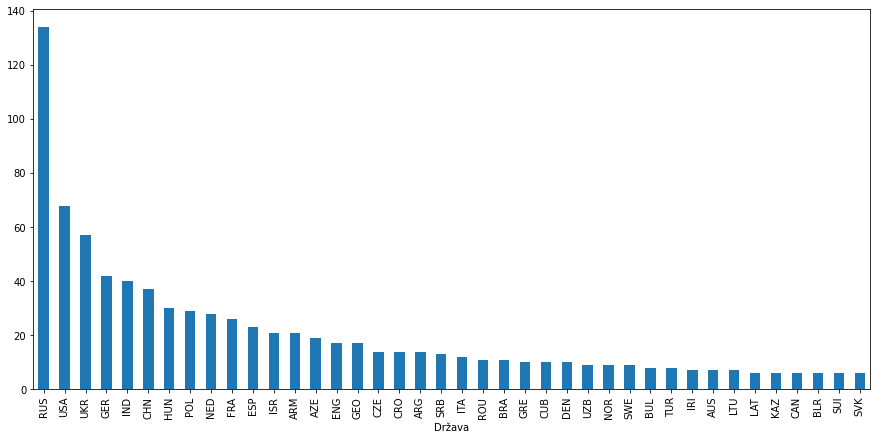

In [6]:
num_of_GM.plot.bar(x = "Država", figsize = (15, 7))

<AxesSubplot:xlabel='Country'>

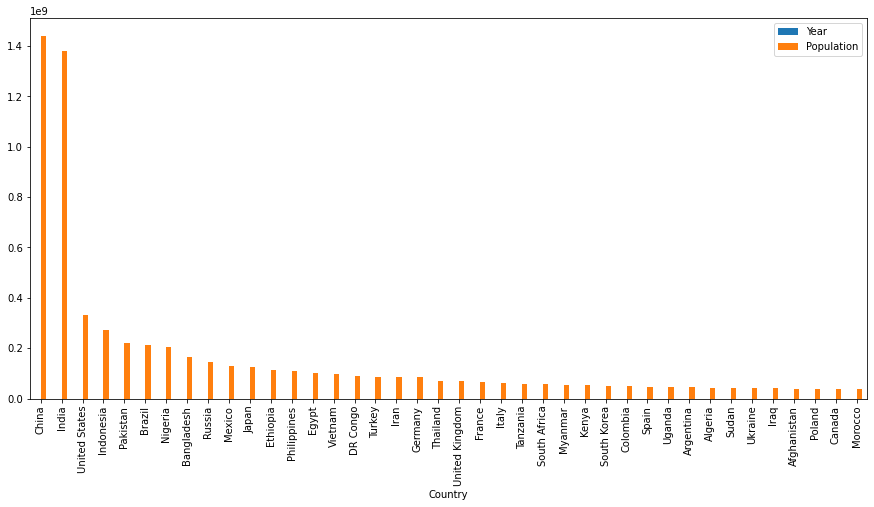

In [7]:
pom = populacije[["Country" ,"Year", "Population"]]
populacije_2020 = pom[pom["Year"] == 2020].head(40)
populacije_2020.plot.bar(x = "Country", figsize = (15, 7))

Vidimo, da je ima izmed 40 držav z najboljšimi šahisti, 14 od teh med top 40 v populaciji.

# 2. Hipoteza

Poskusimo pokazati, da je v povprečju vsaka sledeča generacija boljša od prejšnje.

In [8]:
vrhunec = sahisti[["Ime","Država", "Classical ocena", "Leto rojstva"]].dropna()
# Obravnavali bomo le šahiste, ki imajo Classical oceno večjo od 0
veljavni = vrhunec[vrhunec["Classical ocena"] > 0].sort_values("Leto rojstva", ascending=True)
veljavni

,Ime,Država,Classical ocena,Leto rojstva
18265,"Toth G., Geza",HUN,2255,1921.0
6625,"Jankov, Todor",BUL,2293,1922.0
2572,"Nowotny, Heinz",AUT,2255,1923.0
34200,"Lipiniks, Leonardo",PAR,1704,1924.0
44044,"Belkadi, Ridha",TUN,2345,1925.0
...,...,...,...,...
24252,"Attieh, Skye",LBN,1476,2015.0
35868,Khaled AlJamaat,QAT,1181,2015.0
23497,"Yrysov, Timur",KGZ,1571,2015.0
10087,"Skouroupathis, Kyriakos",CYP,1142,2015.0


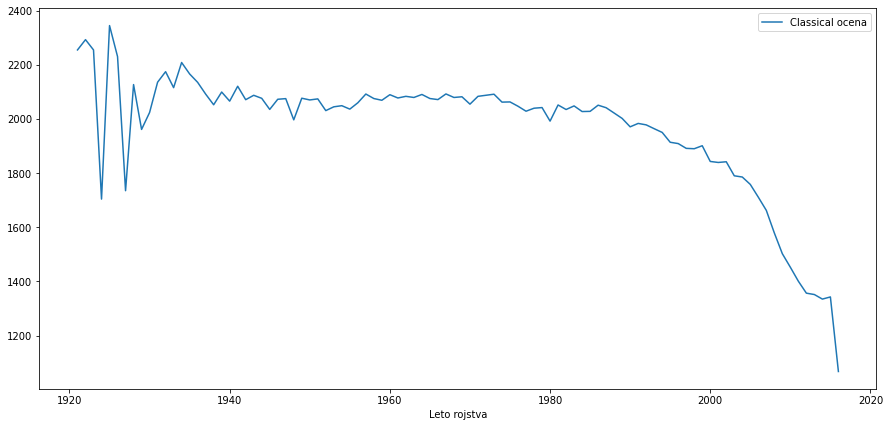

In [9]:
m = int(min(veljavni["Leto rojstva"]))
M = int(max(veljavni["Leto rojstva"]))

stevilo_igralcev_na_leto = veljavni.groupby(["Leto rojstva"]).count()
povprecja_po_letih = veljavni.groupby(["Leto rojstva"]).mean()
povprecja_po_letih["Classical ocena"].plot(legend=True, figsize=(15,7))

plt.show()

#povprecja_po_letih["Classical ocena"]


In [10]:
from cmath import sqrt
from statistics import mean, pstdev

#z = 1.96

def povprecje_za(leto):
   podatki_za_leto = veljavni[veljavni["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   return mean(sez_ocen)

def std_za(leto):
   podatki_za_leto = veljavni[veljavni["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   return pstdev(sez_ocen)

def se_za(leto):
   podatki_za_leto = veljavni[veljavni["Leto rojstva"] == leto]
   sez_ocen = list(podatki_za_leto["Classical ocena"])
   n = len(sez_ocen)
   return pstdev(sez_ocen)/sqrt(n)

#def int_zaupanja(leto):
#   return se_za(leto)*z

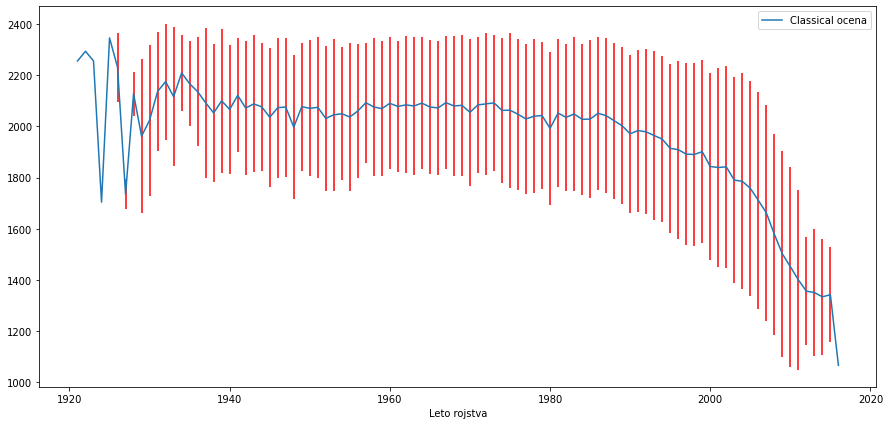

In [11]:
povprecja_po_letih["Classical ocena"].plot(legend=True, figsize=(15,7))

for leto in range(m, M):
    plt.vlines(leto, ymin=(povprecje_za(leto) - std_za(leto)), ymax=(povprecje_za(leto) + std_za(leto)), colors="red")

plt.show()

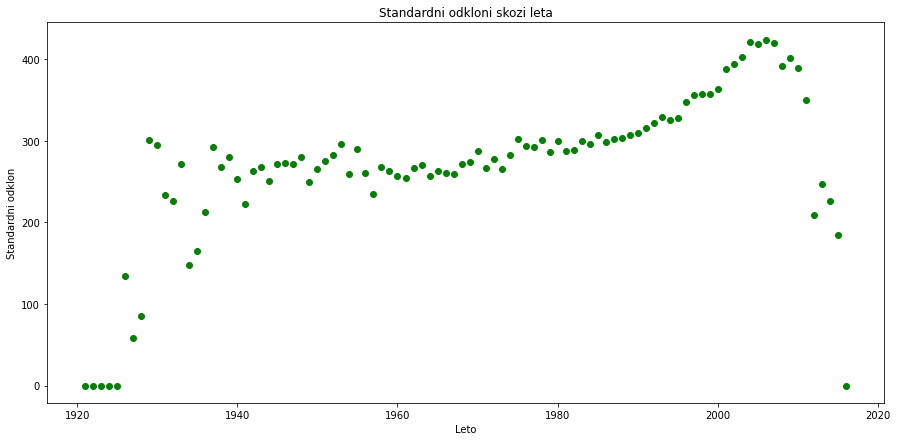

In [12]:
from cProfile import label
from turtle import color


sez_std = [std_za(leto) for leto in range(m,M+1)]
leta = [i for i in range(m, M+1)]

plt.figure(figsize=(15,7))
std_plot = plt.scatter(leta, sez_std, label="a", color="green")
plt.xlabel("Leto")
plt.ylabel("Standardni odklon")
plt.title("Standardni odkloni skozi leta")

plt.show()


<AxesSubplot:xlabel='Leto rojstva'>

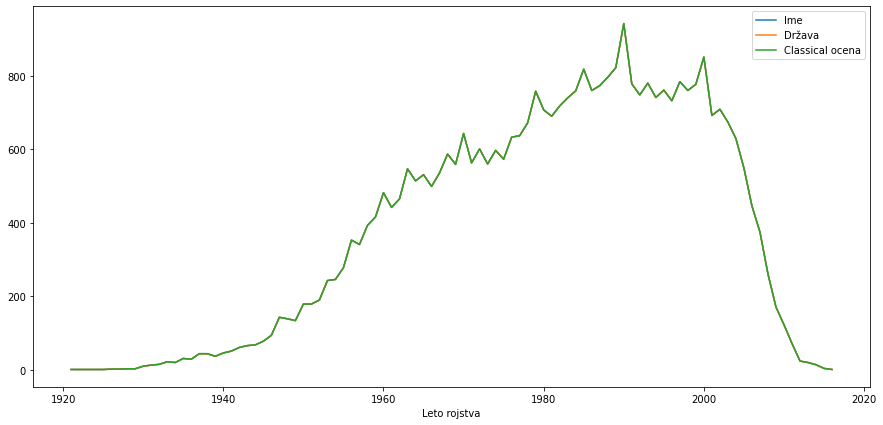

In [13]:
stevilo_igralcev_na_leto.plot(figsize=(15,7))

Kot vidimo z zgornjega grafa, število šahistov z leti narašča, čeprav imamo desno od grafa strog padec(kar je smiselno, saj je to igralci stari 15 ali manj let), prav tako pa imamo skrajno desno zelo malo igralcev. Zato je Smiselno, da določena leta izpisutimo, saj je premalo dokumentiranih šahistov za smiselno analizo, zato poglejmo kako izgledajo grafi, če izpustimo leta s premalo igralci(vsaj 15).

In [14]:
def sez_novih_veljavnih():
    stevila_po_drzavah = {}
    sez_drzav = list(veljavni["Leto rojstva"])
    for i in sez_drzav:
        if stevila_po_drzavah.get(i) == None:
            stevila_po_drzavah[i] = 1
        else:
            stevila_po_drzavah[i] += 1

    return {k: v for (k,v) in stevila_po_drzavah.items() if v >= 15 }.keys()

veljavni_15 = veljavni[veljavni["Leto rojstva"].isin(sez_novih_veljavnih())]


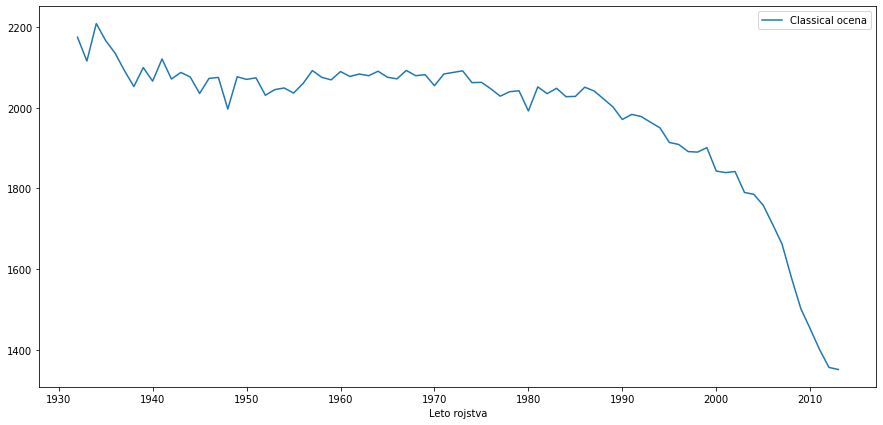

In [15]:
povprecja_po_letih_15 = veljavni_15.groupby(["Leto rojstva"]).mean()
povprecja_po_letih_15["Classical ocena"].plot(legend=True, figsize=(15,7))

plt.show()

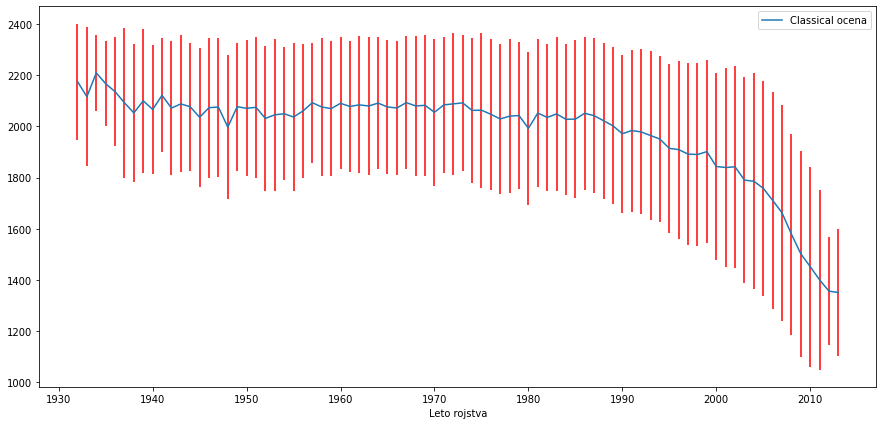

In [18]:
povprecja_po_letih_15["Classical ocena"].plot(legend=True, figsize=(15,7))

for leto in sez_novih_veljavnih():
    plt.vlines(leto, ymin=(povprecje_za(leto) - std_za(leto)), ymax=(povprecje_za(leto) + std_za(leto)), colors="red")

plt.show()

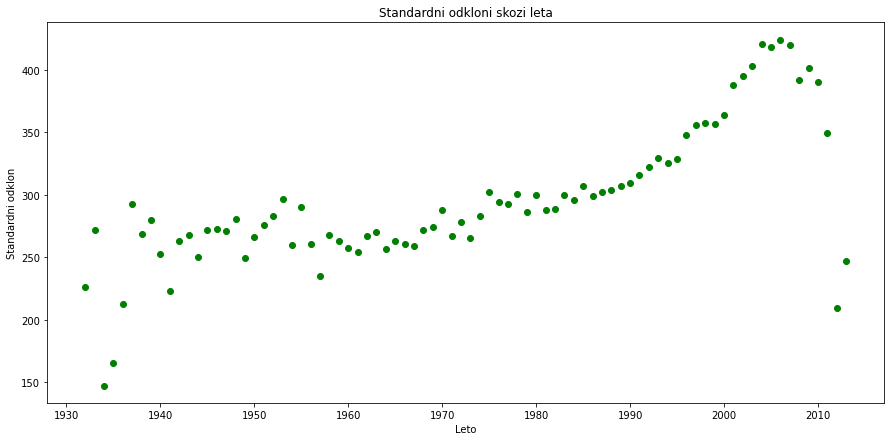

In [19]:
sez_std_15 = [std_za(leto) for leto in sez_novih_veljavnih()]

plt.figure(figsize=(15,7))
std_plot = plt.scatter(sez_novih_veljavnih(), sez_std_15, label="a", color="green")
plt.xlabel("Leto")
plt.ylabel("Standardni odklon")
plt.title("Standardni odkloni skozi leta")

plt.show()

<AxesSubplot:xlabel='Leto rojstva'>

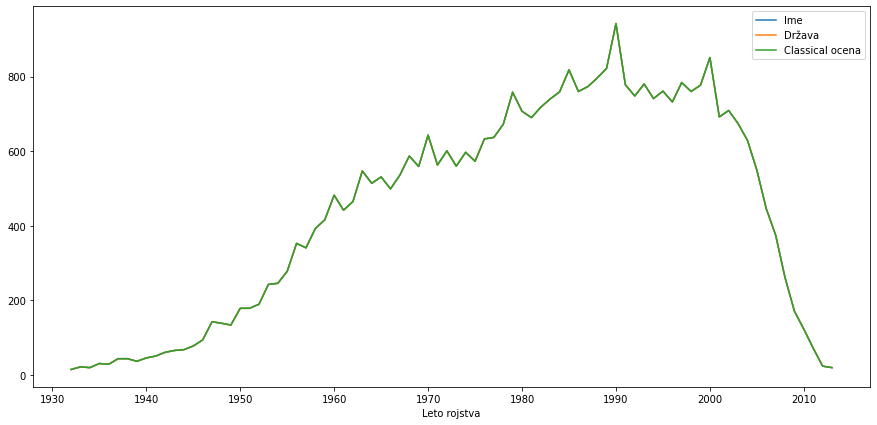

In [20]:
stevilo_igralcev_na_leto_15= veljavni_15.groupby(["Leto rojstva"]).count()
stevilo_igralcev_na_leto_15.plot(figsize=(15,7))